In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xdim = 121
ydim = 101

## Load topography
topo   = np.loadtxt('data/DEM_PF_10m_cut.dat',skiprows=6)
dx = 10
dy = 10
xx = np.arange(0.,2100.+dx,dx)
yy = np.arange(0.,1800.+dy,dy)
levels = np.arange(2190., 2650, 20)
### Load stations
srcs = np.loadtxt('data/stations.txt')
stas_array = ['BON','BOR','DSO','SNE']

xmin =  640.
xmax = 1840.
ymin =  400.
ymax = 1400.

In [231]:
### FREQUENCY COMPARISON
filename  = 'resolution_exp_Z_'
#filename  = 'resolution_exp_Z_noise_normal3277e-26_rmSingularity_'
freqbands = ['BP3to7', 'BP8to12', 'BP13to17']

BP3to7
median(xhalf) =  39.344208968684384
median(xhalf_err) =  0.7034608212670846
median error of xhalf:           1.8576870471488605 %
           x       y         z     res_a  res_a_err     res_k  res_k_err  \
9410  1570.0  1170.0  535.0467  6.991996   0.089478 -0.005983   0.000096   

         res_b  res_b_err      xhalf  xhalf_err     error  xhalf_error  
9410  0.712573   0.014359  48.081571   0.768929  1.599217     1.599217  
BP8to12
median(xhalf) =  39.91105027863026
median(xhalf_err) =  0.7034891552322152
median error of xhalf:           1.8259456233334708 %
           x       y         z     res_a  res_a_err     res_k  res_k_err  \
9410  1570.0  1170.0  535.0467  4.378223   0.067233 -0.004859   0.000111   

         res_b  res_b_err      xhalf  xhalf_err     error  xhalf_error  
9410  0.519491   0.015869  59.211909    1.35673  2.291312     2.291312  
BP13to17
median(xhalf) =  44.56898076447938
median(xhalf_err) =  0.7708539392785532
median error of xhalf:           1.747309357

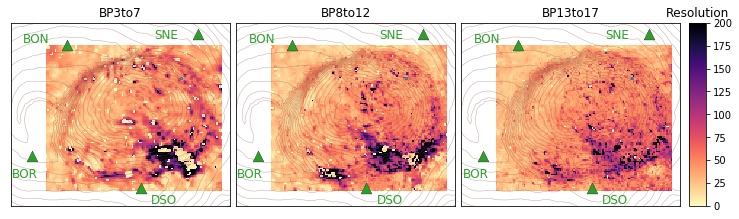

In [256]:
decay_level = 0.75

fig, axes = plt.subplots(1, 3, figsize=(12,4.2))
for fb, ax_im in zip(freqbands, axes):
    
    data = pd.read_csv('resolution/'+filename+fb+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(fb)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    ax_im.scatter(srcs[:,0], srcs[:,1],
        marker='^', c='C2', s=120, edgecolor='k',linewidth=0.3)
    for iista, sta in enumerate(stas_array):
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color='C2')

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(fb)
    
    
    picks = [3398, 5606, 9959, 9896, 4069]
    picks = [9896]
    
    picks = [9410]
    #print(data.x[picks])
    #print(data.y[picks])


    xpicks = np.array(data.x[picks])
    ypicks = np.array(data.y[picks])
    ax_im.scatter(xpicks, ypicks, s=5, facecolors='none', edgecolors='C0')
    
    print(data.loc[picks])


ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_frequency_comparison_w.png', bbox_inches = 'tight', dpi=200)




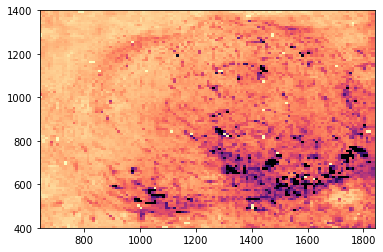

In [249]:
x = np.reshape(np.array(data.x),(ydim, xdim))
y = np.reshape(np.array(data.y),(ydim, xdim))
z = np.reshape(np.array(data.xhalf),(ydim, xdim))
plt.pcolormesh(x, y, z, vmin=0, vmax=200, cmap='magma_r')

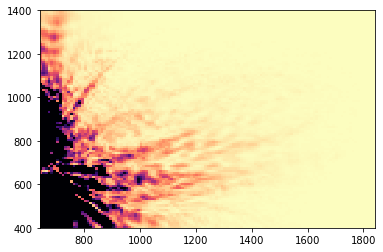

In [255]:
en = np.loadtxt('data/simu/horzN/BOR/BP13to17/energy_Fz.txt')
en = np.reshape(en,(ydim, xdim))
plt.pcolormesh(x, y, en, vmin=0, vmax=1e-23, cmap='magma_r')

In [244]:
np.array(data.xhalf)

array([39.98106937, 38.63520273, 24.07067008, ..., 39.42253433,
       35.52412338, 46.08612918])

In [257]:
### CHANNEL COMPARISON
filename1 = 'resolution_exp_'
filename2 = '_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17'
filename2 = '_BONBORSNE'
channels = ['ENZ', 'E', 'N', 'Z']

ENZ
median(xhalf) =  56.44931075947917
median(xhalf_err) =  0.94564572013688
median error of xhalf:           1.65031960689994 %
E
median(xhalf) =  50.17400732220392
median(xhalf_err) =  1.8188596970456765
median error of xhalf:           3.769204487157154 %
N
median(xhalf) =  47.296180088880476
median(xhalf_err) =  1.6320882568487347
median error of xhalf:           3.6462946443244046 %
Z
median(xhalf) =  43.404425510152485
median(xhalf_err) =  1.435616377515942
median error of xhalf:           3.5207872984102506 %


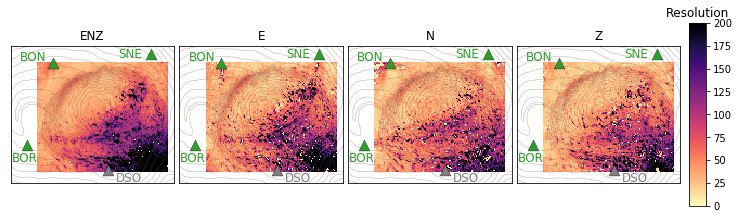

In [258]:
decay_level = 0.75

fig, axes = plt.subplots(1, 4, figsize=(12,4.2))
for ch, ax_im in zip(channels, axes):
    
    data = pd.read_csv('resolution/'+filename1+ch+filename2+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(ch)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        if sta == 'DSO':
            c = 'C7'
        else:
            c = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
                      marker='^', c=c, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(ch)


ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_channel_comparison_w.png', bbox_inches = 'tight', dpi=200)




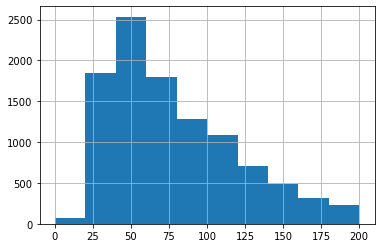

In [219]:
data = pd.read_csv('resolution/resolution_exp_ENZ_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17.csv')
data['xhalf'] = np.log(decay_level)/data.res_k
data['xhalf'] = data['xhalf'].fillna(10000.)
data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err

data['xhalf'].replace([np.inf, -np.inf], np.nan).dropna().hist(range=(0, 200))

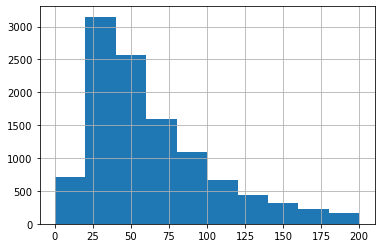

In [220]:
data = pd.read_csv('resolution/resolution_exp_Z_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17.csv')
data['xhalf'] = np.log(decay_level)/data.res_k
data['xhalf'] = data['xhalf'].fillna(10000.)
data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err

data['xhalf'].replace([np.inf, -np.inf], np.nan).dropna().hist(range=(0, 200))

In [263]:
### COMBI COMPARISON 2
filename1 = 'resolution_exp_'
filename2 = '_noise_normal3277e-26_rmSingularity_BP13to17'
channels = ['ENZ', 'Z']

ENZ
median(xhalf) =  54.72205713724781
median(xhalf_err) =  0.7582127994081007
median error of xhalf:           1.3486671276410211 %
Z
median(xhalf) =  44.56898076447938
median(xhalf_err) =  0.7708539392785532
median error of xhalf:           1.7473093572596945 %


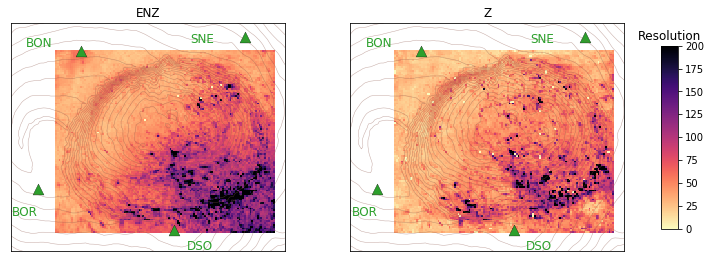

In [264]:
decay_level = 0.75

fig, axes = plt.subplots(1, 2, figsize=(12,4.2))
for ch, ax_im in zip(channels, axes):
    
    data = pd.read_csv('resolution/'+filename1+ch+'_BP13to17.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(ch)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        c = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
                      marker='^', c=c, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(ch)


ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_combi_comparison_2_w.png', bbox_inches = 'tight', dpi=200)




In [265]:
### COMBI COMPARISON
filename1 = 'resolution_exp_Z_'
stations = ['BONBORDSO', 'BONBORSNE', 'BONDSOSNE', 'BORDSOSNE']

BONBORDSO
median(xhalf) =  43.407920940079215
median(xhalf_err) =  1.9856477455004662
median error of xhalf:           4.841002072202688 %
BONBORSNE
median(xhalf) =  43.404425510152485
median(xhalf_err) =  1.435616377515942
median error of xhalf:           3.5207872984102506 %
BONDSOSNE
median(xhalf) =  43.55068732292001
median(xhalf_err) =  1.3752130464733094
median error of xhalf:           3.4045623006050043 %
BORDSOSNE
median(xhalf) =  45.18361003675145
median(xhalf_err) =  1.686989503882846
median error of xhalf:           3.9943838352905146 %


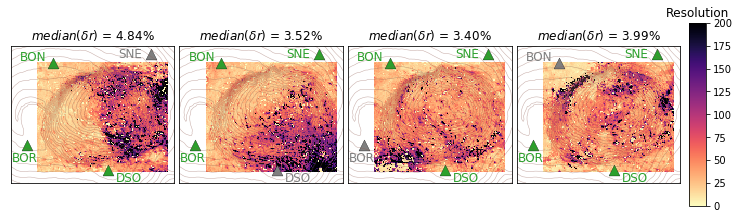

In [266]:
decay_level = 0.75
eliminate = ['SNE', 'DSO', 'BOR', 'BON']

fig, axes = plt.subplots(1, 4, figsize=(12,4.2))
for stat, ax_im, eli in zip(stations, axes, eliminate):
    
    data = pd.read_csv('resolution/'+filename1+stat+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(stat)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        if sta == eli:
            c_eli = 'C7'
        else:
            c_eli = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
            marker='^', c=c_eli, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c_eli)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title('$median(\delta r)$ = {:.2f}%'.format(data['xhalf_error'].median()))


ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_combi_comparison_w.png', bbox_inches = 'tight', dpi=200)


